In [16]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

det0 = serpent.parse_det('/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/pwr100_0_100/pwr_spectrum_det_det0.m')

det10 = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/bol/tap_spectrum.serpent_det0.m')
dete = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/eol/tap_spectrum_eol_ben.serpent_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
energy_grid = det0['DETavrgE']
spectrum_grid = det0['DETavrg']
spectrum_grid2 = det10['DETavrg']
energy = energy_grid[:,2]
energy2 = det10['DETavrgE'][:,2]
flux_spectrum = spectrum_grid[:,10]

# Capture cross section read (Xe135,I135)

In [17]:
file_data_xe = np.genfromtxt("/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/xe135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)
file_data_i = np.genfromtxt("/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/i135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)

energy_grid_xe = np.array(file_data_xe[:,0])
energy_grid_i = np.array(file_data_i[:,0])
xe_capture_xs = np.array(file_data_xe[:,1])
i_capture_xs =  np.array(file_data_i[:,1])

9.244378369138558e+16
3.383896578298691e+21


<IPython.core.display.Javascript object>


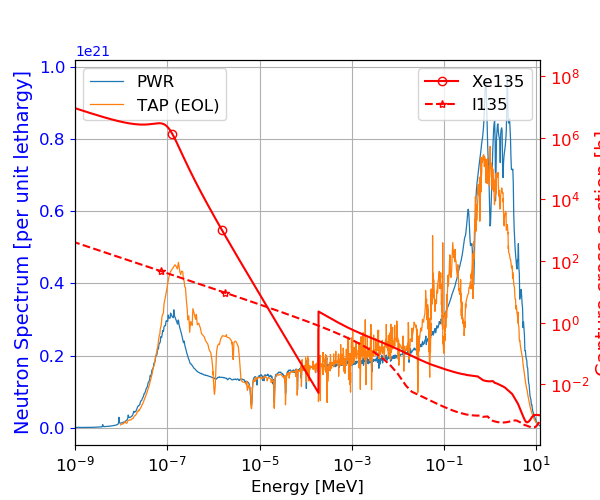

In [23]:
print(np.trapz(spectrum_grid[:,10],energy))
print(np.trapz(spectrum_grid2[:,10],energy2))
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[6,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel('Neutron Spectrum [per unit lethargy]', color='b', fontsize=14)
ax1.tick_params('y', colors='b', labelsize=12)
ax1.tick_params('x', labelsize=12)
#ax.set_ylim(0,1.6E+21)
ax1.set_xlim(1e-8,10)

ax1.semilogx(energy, 4e4*spectrum_grid[:,10], '-', label='PWR', 
            linewidth=0.9)
# ax1.semilogx(energy2, spectrum_grid2[:,10], '-', label='TAP (BOL)', linewidth=0.9)
ax1.semilogx(dete['DETavrgE'][:,2],dete['DETavrg'][:,10],
           '-', label='TAP (EOL)', linewidth=0.9)

#ax.semilogx(energy, spectrum_grid[:,10], '-', label='PWR', color='#ff8100')
#ax.semilogx(energy, spectrum_grid2[:,10], '-', label='TAP(BOC)', linewidth=1, alpha=0.5)
#ax.semilogx(energy, spectrum_grid3[:,10], '-', label='TAP(before shutdown)', linewidth=0.7)
ax1.legend(loc=2, fontsize=12)

ax2=ax1.twinx()
ax2.loglog(energy_grid_xe, xe_capture_xs, 'o-',markevery=[100,210],fillstyle='none',color='r',label='Xe135')
ax2.loglog(energy_grid_i, i_capture_xs, '*--',markevery=[92,125],fillstyle='none',color='r',label='I135')
ax2.set_ylabel('Capture cross-section [b]', color='r', fontsize=14)
ax2.tick_params('y', colors='r', labelsize=12)
ax2.set_xlim(1e-9,12)
ax2.legend(loc=1, fontsize=12)
#ax1.set_title('Neutron spectrum normalized per unit lethargy for \n PWR/TAP vs posions capture cross-section\n')

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2019-rykhl-xenon-ans/pres/images/spectra.png',bbox_inches='tight', dpi=900)